# Визуализация многомерных функций

### Задание функции нескольких переменных

In [1]:
def func02(x,y):
    return x**2+3*x*y+4*y**2

In [2]:
func02(-1.4,2.4)

14.92

### График линий уровня

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [33]:
delta=0.025
x=np.arange(-3.0,3.0,delta)
y=np.arange(-3.0,3.0,delta)
X, Y = np.meshgrid(x,y)

In [34]:
Z1= np.exp(-X**2 - Y**2)
Z2= np.exp(-(X-1)**2 - (Y-1)**2)
Z=(Z1-Z2)*2

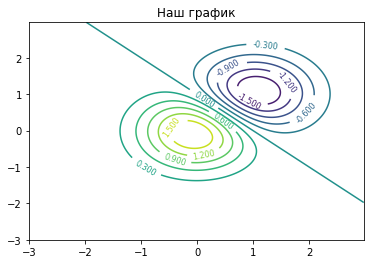

In [38]:
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z,12)
ax.clabel(CS,inline=True, fontsize=8)
ax.set_title('Наш график');

### Трехмерный график с цветовой легендой

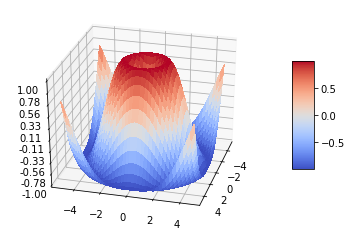

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Данные
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)


# График поверхности
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Настройка оси z
ax.set_zlim(-1, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Цветовая легенда
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.azim = 15
ax.dist = 10
ax.elev = 30

plt.show()

### Сложный график с несколькими объектами

<Figure size 432x288 with 0 Axes>

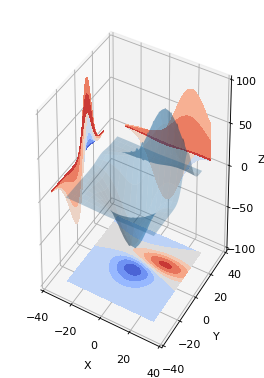

In [52]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
fig = plt.figure(figsize=(4, 6), dpi=80)
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

### Специализированные графики

Рассмотрим на примере 2D и 3D векторных полей. 

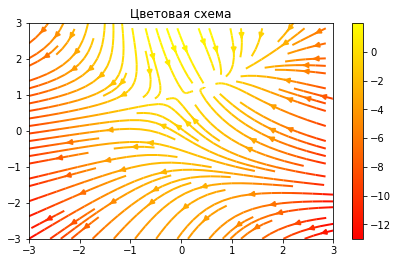

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

# Управление цветом
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Цветовая схема')

plt.show()

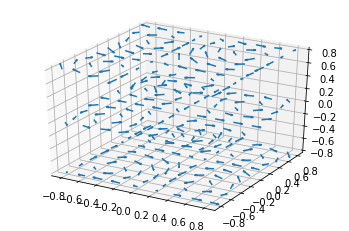

In [30]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Трехмерная решетка
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Направления векторов
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

### Пример графика с текстурой

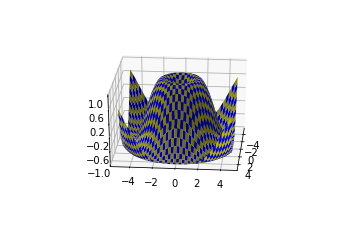

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Создание данных
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Создаем пустой массив размером с нушу сетку и прописываем цвета в шахматном порядке
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

# Построение поверхности с использование масива текстуры
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Настройка оси z
ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))

ax.azim = 5
ax.dist = 15
ax.elev = 30

plt.show()